In [180]:
# Keep necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [181]:
# Load data
df = pd.read_csv('/content/telco_train.csv.csv')

In [182]:
def handle_TotalCharges_MonthlyCharges(df):
  # Handle TotalCharges conversion and missing values
  # Replace blank strings (including ' ') with NaN
  df['TotalCharges'] = df['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)
  # Now convert to float
  df['TotalCharges'] = df['TotalCharges'].astype(float)
  # Convert MonthlyCharges to float
  df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)

In [183]:
handle_TotalCharges_MonthlyCharges(df)

In [184]:
# Drop rows with missing values in 'TotalCharges'
df.dropna(subset=['TotalCharges'], inplace=True) # Keep this line as it's now handling missing values

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 5626 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5626 non-null   object 
 1   gender            5626 non-null   object 
 2   SeniorCitizen     5626 non-null   int64  
 3   Partner           5626 non-null   object 
 4   Dependents        5626 non-null   object 
 5   tenure            5626 non-null   int64  
 6   PhoneService      5626 non-null   object 
 7   MultipleLines     5626 non-null   object 
 8   InternetService   5626 non-null   object 
 9   OnlineSecurity    5626 non-null   object 
 10  OnlineBackup      5626 non-null   object 
 11  DeviceProtection  5626 non-null   object 
 12  TechSupport       5626 non-null   object 
 13  StreamingTV       5626 non-null   object 
 14  StreamingMovies   5626 non-null   object 
 15  Contract          5626 non-null   object 
 16  PaperlessBilling  5626 non-null  

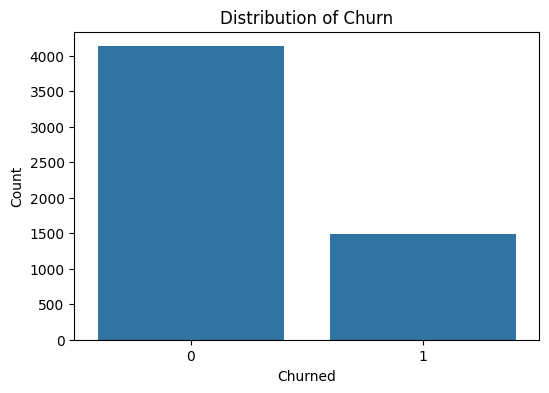

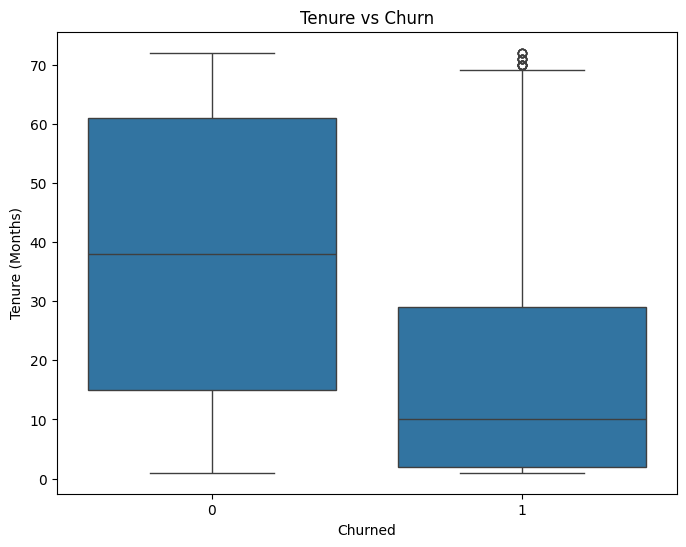

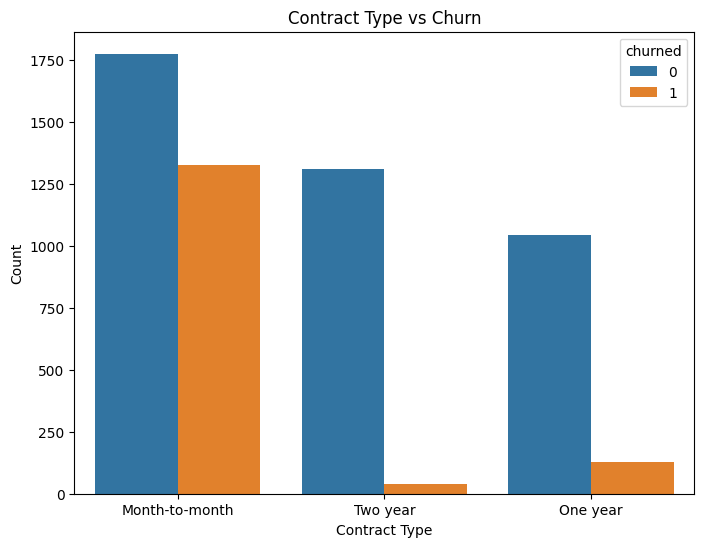

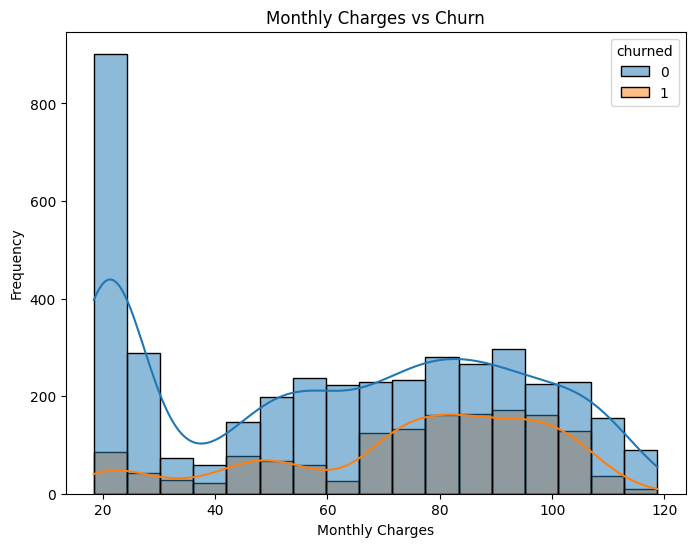

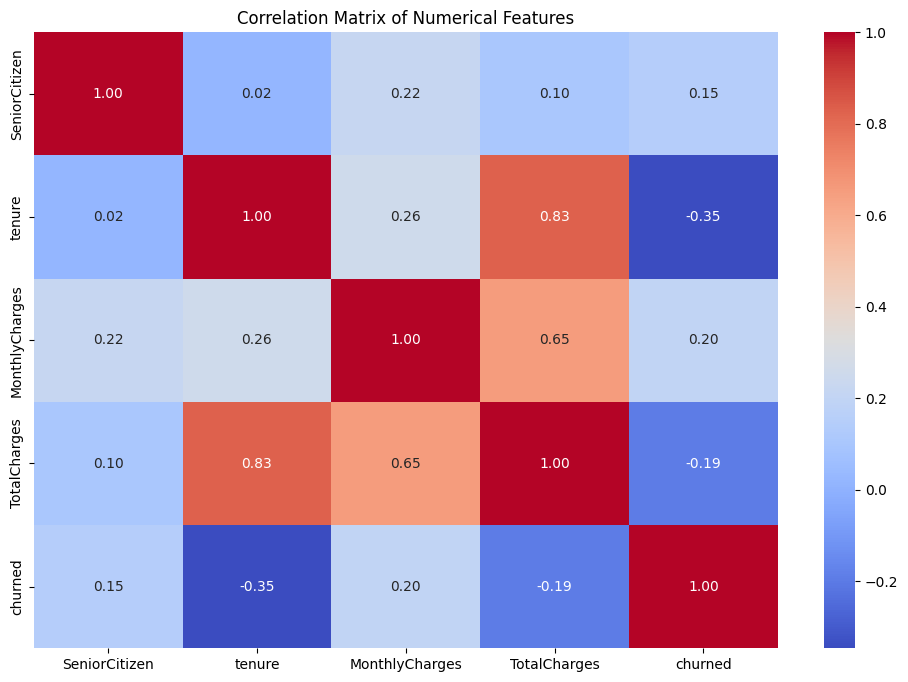


--- EDA Report ---
Dataset contains information about telco customers.
Shape of the dataset: (5626, 21)
Data types for each column are as follows:
<class 'pandas.core.frame.DataFrame'>
Index: 5626 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5626 non-null   object 
 1   gender            5626 non-null   object 
 2   SeniorCitizen     5626 non-null   int64  
 3   Partner           5626 non-null   object 
 4   Dependents        5626 non-null   object 
 5   tenure            5626 non-null   int64  
 6   PhoneService      5626 non-null   object 
 7   MultipleLines     5626 non-null   object 
 8   InternetService   5626 non-null   object 
 9   OnlineSecurity    5626 non-null   object 
 10  OnlineBackup      5626 non-null   object 
 11  DeviceProtection  5626 non-null   object 
 12  TechSupport       5626 non-null   object 
 13  StreamingTV       5626 non-null   object

In [185]:
# Initial EDA
# Display basic information
print("Dataset Info:")
print(df.info())
# Display the first few rows
print("\nFirst 5 Rows:")
print(df.head())
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())
# Target variable distribution
print("\nChurn Distribution:")
print(df['churned'].value_counts())
print(df['churned'].value_counts(normalize=True) * 100)
plt.figure(figsize=(6, 4))
sns.countplot(x='churned', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churned')
plt.ylabel('Count')
plt.show()
# Explore relationships with the target variable (example: Tenure vs Churn)
plt.figure(figsize=(8, 6))
sns.boxplot(x='churned', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.xlabel('Churned')
plt.ylabel('Tenure (Months)')
plt.show()
# Explore relationships with the target variable (example: Contract Type vs Churn)
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='churned', data=df)
plt.title('Contract Type vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()
# Explore distribution of numerical features (example: MonthlyCharges)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='churned', kde=True)
plt.title('Monthly Charges vs Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()
# Correlation matrix for numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()
print("\n--- EDA Report ---")
print("Dataset contains information about telco customers.")
print(f"Shape of the dataset: {df.shape}")
print("Data types for each column are as follows:")
print(df.info())
print("\nMissing values were identified in several columns. These need to be handled before modeling.")
print("The target variable 'churned' is imbalanced, with a majority of customers not churning.")
print(f"Churn Rate: {df['churned'].value_counts(normalize=True)[1]*100:.2f}%")
print("\nInitial observations on relationships with churn:")
print("- Customers with shorter tenure appear more likely to churn.")
print("- Customers with Month-to-month contracts have a significantly higher churn rate compared to those with One year or Two year contracts.")
print("- Customers with higher monthly charges show a tendency towards higher churn.")
print("\nThe correlation matrix indicates potential relationships between numerical features, which could be useful for feature selection or engineering.")
print("\nFurther analysis could include exploring other categorical variables, feature engineering, and handling outliers.")


In [186]:
# Drop customerID
df = df.drop('customerID', axis=1)

In [187]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(categorical_cols)
print(numerical_cols)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'churned'], dtype='object')


In [188]:
for col in categorical_cols:
  print('Unique values in column', col, 'are:')
  print(df[col].unique())

Unique values in column gender are:
['Male' 'Female']
Unique values in column Partner are:
['No' 'Yes']
Unique values in column Dependents are:
['No' 'Yes']
Unique values in column PhoneService are:
['No' 'Yes']
Unique values in column MultipleLines are:
['No phone service' 'No' 'Yes']
Unique values in column InternetService are:
['DSL' 'Fiber optic' 'No']
Unique values in column OnlineSecurity are:
['No' 'Yes' 'No internet service']
Unique values in column OnlineBackup are:
['No' 'Yes' 'No internet service']
Unique values in column DeviceProtection are:
['Yes' 'No' 'No internet service']
Unique values in column TechSupport are:
['No' 'Yes' 'No internet service']
Unique values in column StreamingTV are:
['Yes' 'No' 'No internet service']
Unique values in column StreamingMovies are:
['Yes' 'No' 'No internet service']
Unique values in column Contract are:
['Month-to-month' 'Two year' 'One year']
Unique values in column PaperlessBilling are:
['No' 'Yes']
Unique values in column PaymentMet

In [189]:
# Defining a function for Sparse Encoding categorical features
def get_sparse_encoded(data):
    for col in categorical_cols:
        unique_map = df[col].unique()
        unique_map = {unique_map[i]: i for i in range(len(unique_map))}
        data[col] = data[col].map(unique_map)

    return data

In [190]:
df_encoded = get_sparse_encoded(df.copy())

for col in categorical_cols:
  print('Unique values in column', col, 'are:')
  print(df_encoded[col].unique())

Unique values in column gender are:
[0 1]
Unique values in column Partner are:
[0 1]
Unique values in column Dependents are:
[0 1]
Unique values in column PhoneService are:
[0 1]
Unique values in column MultipleLines are:
[0 1 2]
Unique values in column InternetService are:
[0 1 2]
Unique values in column OnlineSecurity are:
[0 1 2]
Unique values in column OnlineBackup are:
[0 1 2]
Unique values in column DeviceProtection are:
[0 1 2]
Unique values in column TechSupport are:
[0 1 2]
Unique values in column StreamingTV are:
[0 1 2]
Unique values in column StreamingMovies are:
[0 1 2]
Unique values in column Contract are:
[0 1 2]
Unique values in column PaperlessBilling are:
[0 1]
Unique values in column PaymentMethod are:
[0 1 2 3]


In [191]:
# Split data into train and test datasets
from sklearn.model_selection import train_test_split
# Separate features (X) and target (y)
X = df_encoded.drop('churned', axis=1)
y = df_encoded['churned']
# Perform stratified train-test split
# Get the indices for the test set first, with 500 samples from each class
test_indices_churned = df_encoded[df_encoded['churned'] == 1].sample(n=500, random_state=42).index
test_indices_not_churned = df_encoded[df_encoded['churned'] == 0].sample(n=500, random_state=42).index
test_indices = test_indices_churned.union(test_indices_not_churned)
# Get the remaining indices for the training set
train_indices = df.index.difference(test_indices)
# Split the data using the indices
X_train = X.loc[train_indices]
y_train = y.loc[train_indices]
X_test = X.loc[test_indices]
y_test = y.loc[test_indices]
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("\nDistribution of churn in y_train:")
print(y_train.value_counts())
print("\nDistribution of churn in y_test:")
print(y_test.value_counts())


Shape of X_train: (4626, 19)
Shape of y_train: (4626,)
Shape of X_test: (1000, 19)
Shape of y_test: (1000,)

Distribution of churn in y_train:
churned
0    3631
1     995
Name: count, dtype: int64

Distribution of churn in y_test:
churned
0    500
1    500
Name: count, dtype: int64


In [192]:
# Calculate class weights
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
# Calculate class weights based on the training data
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))
print("Class weights:")
print(class_weights_dict)

Class weights:
{np.int64(0): np.float64(0.6370145965298816), np.int64(1): np.float64(2.3246231155778894)}


In [193]:
# Train models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC # Import SVM
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
# Initialize models
log_reg = LogisticRegression(solver='liblinear', random_state=42, class_weight=class_weights_dict)
random_forest = RandomForestClassifier(random_state=42, class_weight=class_weights_dict)
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=class_weights_dict[1]/class_weights_dict[0]) # XGBoost uses scale_pos_weight
mlp = MLPClassifier(random_state=42, max_iter=1000) # MLP does not directly support class_weight
models = {
    "Logistic Regression": log_reg,
    "Random Forest": random_forest,
    "XGBoost": xgb_model,
    "MLP": mlp,
}
# Train models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print(f"{name} trained.")

Training Logistic Regression...
Logistic Regression trained.
Training Random Forest...
Random Forest trained.
Training XGBoost...
XGBoost trained.
Training MLP...
MLP trained.


In [194]:
# Evaluate models with default threshold
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
# Evaluate models
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n{cm}")
    # AUC-ROC Score
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC-ROC Score for {name}: {auc_roc:.4f}")
    # Classification Report
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")



Evaluating Logistic Regression...
Confusion Matrix for Logistic Regression:
[[382 118]
 [106 394]]
AUC-ROC Score for Logistic Regression: 0.8589
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       500
           1       0.77      0.79      0.78       500

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000


Evaluating Random Forest...
Confusion Matrix for Random Forest:
[[466  34]
 [301 199]]
AUC-ROC Score for Random Forest: 0.8448
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.61      0.93      0.74       500
           1       0.85      0.40      0.54       500

    accuracy                           0.67      1000
   macro avg       0.73      0.67      0.64      1000
weighted avg       0.73      0.67      

In [195]:
# Calculate ROC curve data
from sklearn.metrics import roc_curve
roc_data = {}
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_data[name] = {'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds}
print("Calculated ROC curve data for each model.")


Calculated ROC curve data for each model.


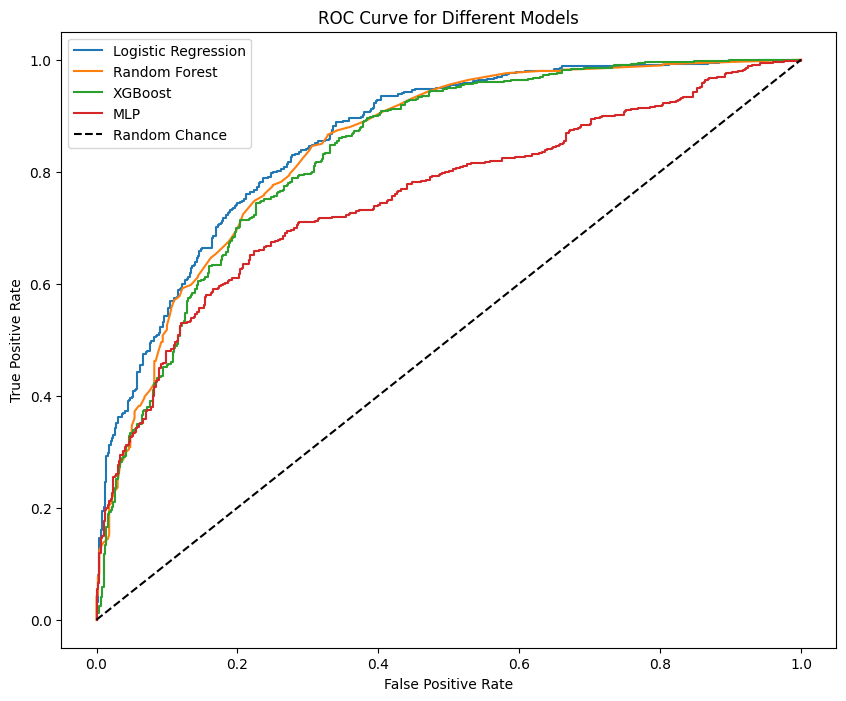

In [196]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=name)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curve for Different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [197]:
# Determine optimal thresholds
optimal_thresholds = {}
for name, data in roc_data.items():
    fpr = data['fpr']
    tpr = data['tpr']
    thresholds = data['thresholds']
    # Calculate the difference between TPR and FPR
    diff = tpr - fpr
    # Find the index of the maximum difference
    optimal_threshold_index = np.argmax(diff)
    # Get the optimal threshold
    optimal_threshold = thresholds[optimal_threshold_index]
    optimal_thresholds[name] = optimal_threshold
print("Optimal thresholds for each model:")
print(optimal_thresholds)


Optimal thresholds for each model:
{'Logistic Regression': np.float64(0.5020118683845645), 'Random Forest': np.float64(0.17), 'XGBoost': np.float32(0.35140112), 'MLP': np.float64(0.015662084796306954)}


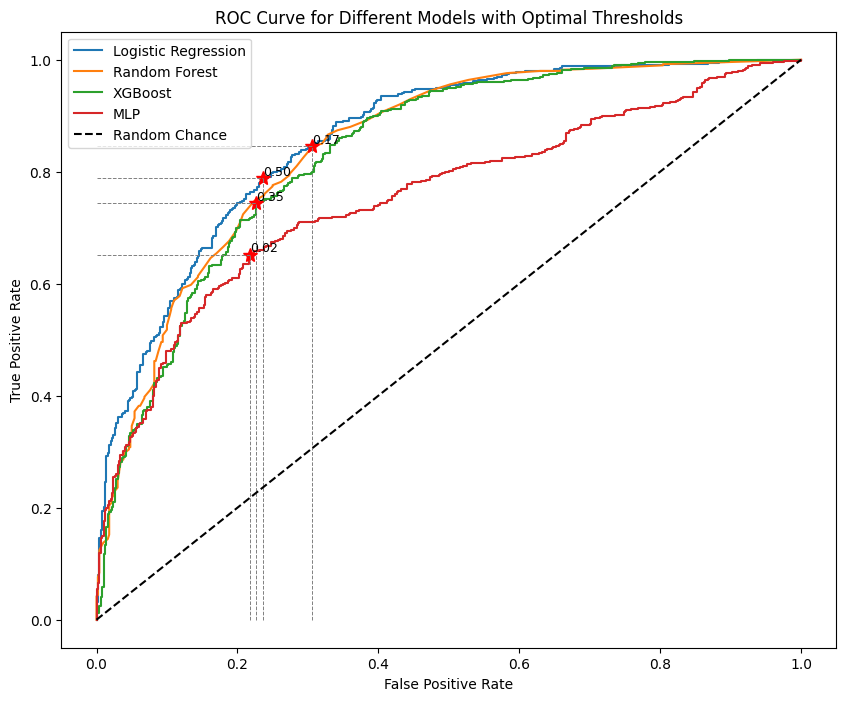

In [198]:
# Visualize optimal thresholds on ROC plot
plt.figure(figsize=(10, 8))
for name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=name)
    # Find the index closest to the optimal threshold
    optimal_threshold_index = np.argmin(np.abs(data['thresholds'] - optimal_thresholds[name]))
    # Get the FPR and TPR at the optimal threshold
    optimal_fpr = data['fpr'][optimal_threshold_index]
    optimal_tpr = data['tpr'][optimal_threshold_index]
    # Plot a marker at the optimal threshold
    plt.plot(optimal_fpr, optimal_tpr, '*', color='red', markersize=10)
    # Add dashed lines to indicate the optimal threshold point
    plt.vlines(optimal_fpr, 0, optimal_tpr, color='gray', linestyle='--', linewidth=0.7)
    plt.hlines(optimal_tpr, 0, optimal_fpr, color='gray', linestyle='--', linewidth=0.7)
    # Add text annotation for the optimal threshold value
    plt.text(optimal_fpr, optimal_tpr, f'{optimal_thresholds[name]:.2f}', fontsize=9, va='bottom', ha='left')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curve for Different Models with Optimal Thresholds')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [199]:
# Report optimal thresholds
for name, threshold in optimal_thresholds.items():
    print(f"Optimal threshold for {name}: {threshold:.4f}")


Optimal threshold for Logistic Regression: 0.5020
Optimal threshold for Random Forest: 0.1700
Optimal threshold for XGBoost: 0.3514
Optimal threshold for MLP: 0.0157


In [200]:
# Classification reports with optimal thresholds
from sklearn.metrics import classification_report
print("Classification reports with optimal thresholds:")
for name, model in models.items():
    # Get predicted probabilities for the positive class
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    # Apply the optimal threshold to get predicted class labels
    optimal_threshold = optimal_thresholds[name]
    y_pred_optimal_threshold = (y_pred_proba >= optimal_threshold).astype(int)
    # Generate and print the classification report
    print(f"\n--- {name} Classification Report (Optimal Threshold: {optimal_threshold:.4f}) ---")
    print(classification_report(y_test, y_pred_optimal_threshold))

Classification reports with optimal thresholds:

--- Logistic Regression Classification Report (Optimal Threshold: 0.5020) ---
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       500
           1       0.77      0.79      0.78       500

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000


--- Random Forest Classification Report (Optimal Threshold: 0.1700) ---
              precision    recall  f1-score   support

           0       0.82      0.69      0.75       500
           1       0.73      0.85      0.79       500

    accuracy                           0.77      1000
   macro avg       0.78      0.77      0.77      1000
weighted avg       0.78      0.77      0.77      1000


--- XGBoost Classification Report (Optimal Threshold: 0.3514) ---
              precision    recall  f1-score   support

           0       0.75 

# Telco Churn Prediction Analysis Report

## 1. Data Loading and Initial Exploration

- The dataset `telco_train.csv` was loaded into a pandas DataFrame.
- Basic information about the dataset, including data types and non-null counts, was displayed using `df.info()`.
- The first 5 rows of the DataFrame were shown using `df.head()`.
- Summary statistics for all columns were generated using `df.describe(include='all')`.
- Missing values were checked using `df.isnull().sum()`.

## 2. Data Preprocessing

- The 'TotalCharges' column, which contained blank strings, was handled by replacing them with `np.nan`.
- The 'TotalCharges' column was converted to a float data type.
- Rows with missing values in 'TotalCharges' were removed using `df.dropna()`.
- The 'MonthlyCharges' column was converted to a float data type.
- The 'customerID' column was dropped as it is not relevant for modeling.

## 3. Exploratory Data Analysis (EDA)

- The distribution of the target variable 'churned' was analyzed using `value_counts()` and visualized using a countplot. It was noted that the target variable is imbalanced.
- Relationships between 'churned' and other features were explored through visualizations:
    - Boxplot of 'tenure' vs 'churned'.
    - Countplot of 'Contract' vs 'churned'.
    - Histogram of 'MonthlyCharges' vs 'churned'.
- A correlation matrix for numerical features was generated and visualized using a heatmap.
- An EDA report summarizing initial findings was printed, highlighting insights about tenure, contract type, monthly charges, and the need to handle missing values and class imbalance.

## 4. Feature Engineering (Sparse Encoding)

- Categorical and numerical columns were identified.
- A function `get_sparse_encoded` was defined to perform sparse encoding on selected categorical features. For every categorical features, a unique integer was assigned to each unique value.
- The sparse encoding function was applied to the DataFrame.

## 5. Data Splitting

- The data was split into features (X) and the target variable (y).
- A stratified train-test split was performed to ensure that both the training and testing sets have a balanced representation of the churned and non-churned classes. Specifically, 500 samples from each class were selected for the test set, and the remaining data was used for training.
- The shapes of the training and testing sets were printed, along with the distribution of churn in each set.

## 6. Handling Class Imbalance

- Class weights were calculated using `compute_class_weight('balanced', ...)` based on the distribution of the target variable in the training data.
- These class weights were stored in a dictionary.

## 7. Model Training

- Several classification models were initialized: Logistic Regression, Random Forest Classifier, XGBoost Classifier, and MLP Classifier.
- Class weights were applied to Logistic Regression, Random Forest, and XGBoost models to address the class imbalance. XGBoost used `scale_pos_weight` derived from the class weights. MLP does not directly support class weights.
- The models were trained on the training data (`X_train`, `y_train`).

## 8. Model Evaluation (Default Threshold)

- The trained models were evaluated on the test data (`X_test`, `y_test`) using the default prediction threshold (0.5).
- For each model, the following metrics were calculated and printed:
    - Confusion Matrix
    - AUC-ROC Score
    - Classification Report (including precision, recall, f1-score, and support)

## 9. Optimal Threshold Determination and Evaluation

- ROC curve data (False Positive Rate, True Positive Rate, and thresholds) was calculated for each model.
- The optimal threshold for each model was determined by finding the threshold that maximizes the difference between True Positive Rate and False Positive Rate.
- The ROC curves were plotted, with markers indicating the optimal threshold for each model.
- The optimal thresholds were reported.
- Classification reports were generated for each model using their respective optimal thresholds to evaluate performance at these optimized operating points.

## Summary, Suggestions, and Insights

**Summary:**

The analysis involved loading and preprocessing telco customer data, performing exploratory data analysis to understand churn patterns, encoding categorical features, splitting the data into balanced training and testing sets, handling class imbalance using class weights, training four different classification models (Logistic Regression, Random Forest, XGBoost, and MLP), and evaluating their performance using various metrics including AUC-ROC, confusion matrices, and classification reports. Optimal thresholds were also determined and used for a more targeted evaluation.

**Insights:**

- The dataset exhibits class imbalance, with a significantly higher number of non-churned customers.
- Initial EDA revealed that tenure, contract type (especially month-to-month), and monthly charges are important factors influencing churn.
- Using class weights helped the models to give more importance to the minority class (churned customers), which is crucial in imbalanced datasets.
- The ROC curve analysis and optimal threshold determination provide a more nuanced view of model performance beyond the default threshold, allowing for selection of operating points that balance the trade-off between false positives and false negatives according to business needs.

**Suggestions for Future Work:**

- **Feature Engineering:** Explore more sophisticated feature engineering techniques, such as creating interaction terms or polynomial features for numerical variables, or using other encoding methods for categorical features (e.g., one-hot encoding, target encoding).
- **Hyperparameter Tuning:** The current models were trained with default or basic parameters. Further improve model performance by performing thorough hyperparameter tuning using techniques like GridSearchCV or RandomizedSearchCV.
- **Different Models:** Experiment with other classification algorithms, such as Gradient Boosting Machines (besides XGBoost), Support Vector Machines (SVM) with different kernels, or ensemble methods like stacking or bagging.
- **Cross-Validation:** Implement cross-validation during the training phase to get a more robust estimate of model performance and reduce the risk of overfitting.
- **Explainability:** Investigate model interpretability techniques (e.g., SHAP values, LIME) to understand which features are most important for predicting churn for each model. This can provide valuable business insights.
- **Business Impact:** Translate the model's predictions into actionable business strategies. For instance, identify high-risk customers based on the model's output and design targeted retention campaigns. Consider the cost of false positives and false negatives when selecting the final model and its operating threshold.

In [202]:
# Import 'shap' library
import shap
# Initialize a shap.Explainer object with the trained Logistic Regression model's predict_proba method and the test data as the masker.
explainer = shap.Explainer(models["Logistic Regression"].predict_proba, X_test)
# Calculate the SHAP values for the test dataset (X_test) using the explainer.
shap_values = explainer(X_test)
print("Calculated SHAP values for the Logistic Regression model.")

PermutationExplainer explainer: 1001it [00:39, 16.60it/s]                          

Calculated SHAP values for the Logistic Regression model.


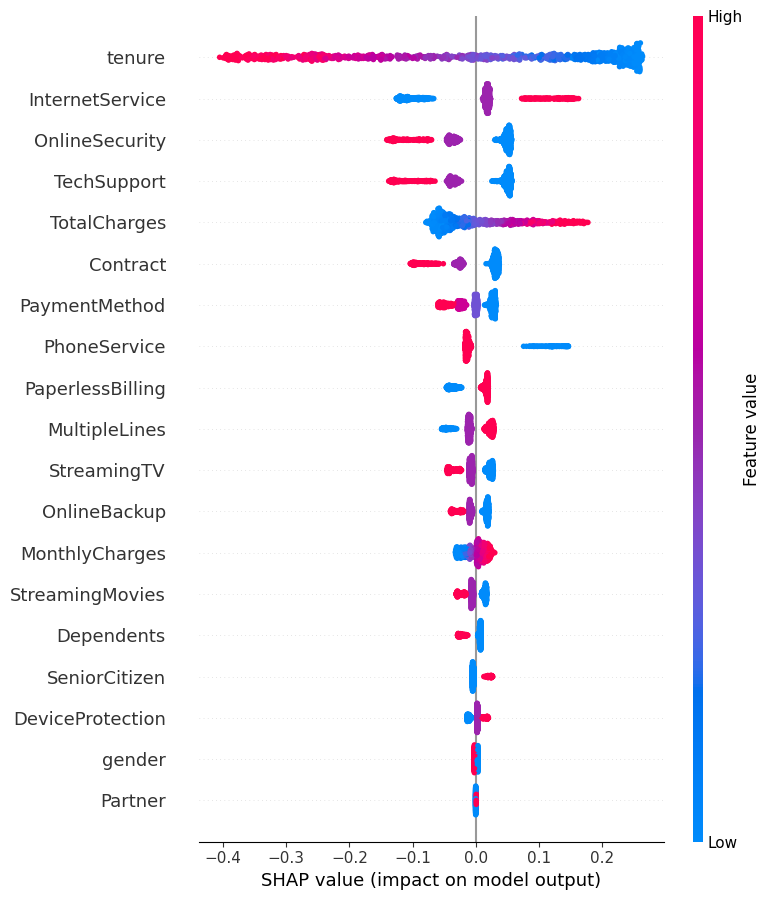

Shape of shap_values: (1000, 19, 2)


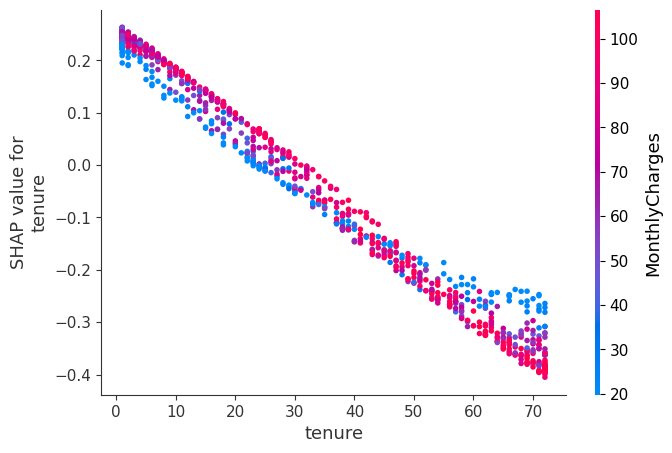

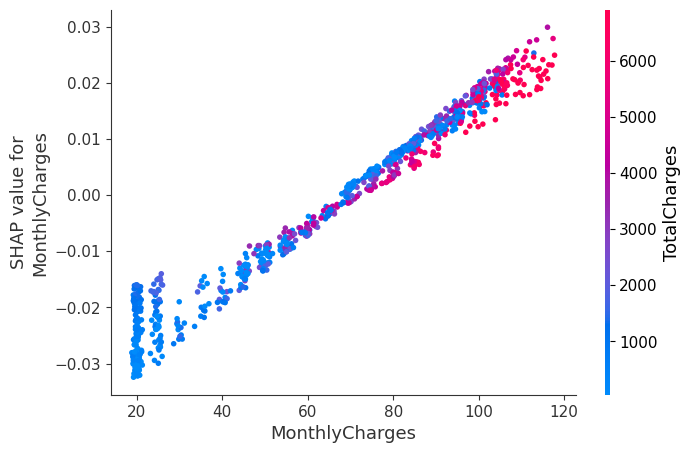

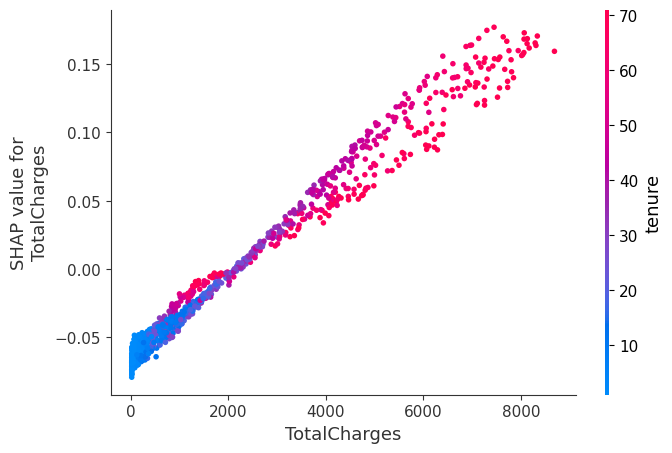

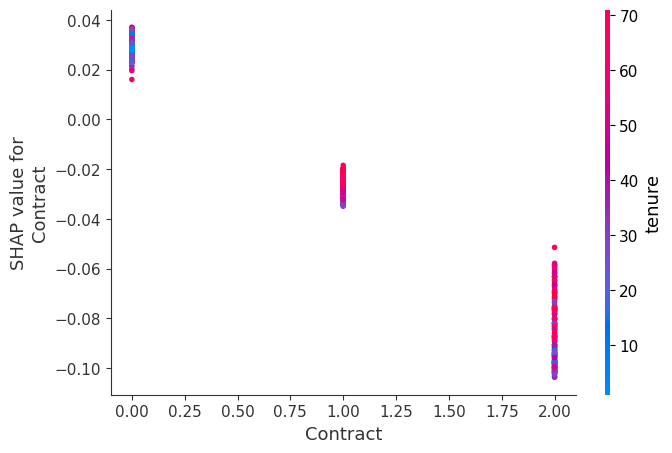

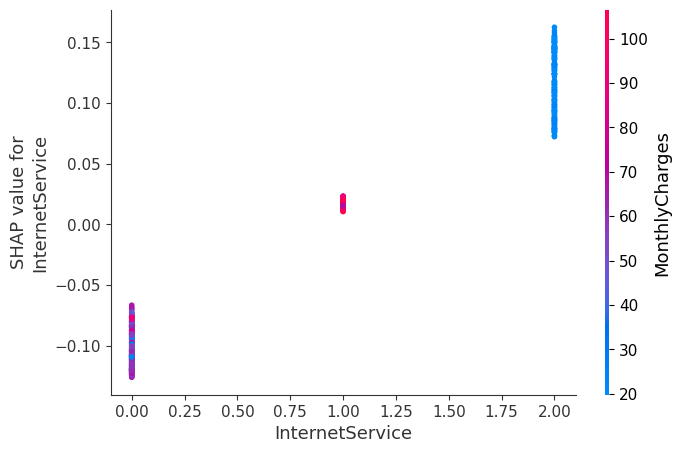

In [203]:
# Generate SHAP summary plot
shap.summary_plot(shap_values[:,:,1], X_test) # Use shap_values[:,:,1] for the positive class (churned=1)
# Identify a few key features from the summary plot (e.g., top 3-5 based on overall importance)
# Based on the summary plot, 'tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'InternetService' appear to be important.
# Generate SHAP dependence plots for key features
# Dependence plot for 'tenure', colored by 'MonthlyCharges'
# Inspect the shape of shap_values to understand its structure
print("Shape of shap_values:", shap_values.shape)
# we need to select the SHAP values for the positive class (index 1) across all samples and features.
# The dependence_plot function expects SHAP values with shape (n_samples, n_features).
shap.dependence_plot('tenure', shap_values.values[:, :, 1], X_test, interaction_index='MonthlyCharges')
# Dependence plot for 'MonthlyCharges', colored by 'TotalCharges'
shap.dependence_plot('MonthlyCharges', shap_values.values[:, :, 1], X_test, interaction_index='TotalCharges')
# Dependence plot for 'TotalCharges', colored by 'tenure'
shap.dependence_plot('TotalCharges', shap_values.values[:, :, 1], X_test, interaction_index='tenure')
# Dependence plot for 'Contract', colored by 'tenure'
shap.dependence_plot('Contract', shap_values.values[:, :, 1], X_test, interaction_index='tenure')
# Dependence plot for 'InternetService', colored by 'MonthlyCharges'
shap.dependence_plot('InternetService', shap_values.values[:, :, 1], X_test, interaction_index='MonthlyCharges')

In [204]:
# Visualize individual predictions (e.g., the first few instances in the test set)
# Use the SHAP values for the positive class (churned=1)
shap.initjs() # Initialize JavaScript for interactive plots
# Visualize the first instance
print("Force plot for the first instance:")
shap.force_plot(shap_values.base_values[0, 1], shap_values.values[0,:,1], X_test.iloc[0,:])

Force plot for the first instance:


In [205]:
shap.initjs() # Initialize JavaScript for interactive plots
# Visualize the second instance
print("\nForce plot for the second instance:")
shap.force_plot(shap_values.base_values[1, 1], shap_values.values[1,:,1], X_test.iloc[1,:])


Force plot for the second instance:


In [206]:
shap.initjs() # Initialize JavaScript for interactive plots
# Visualize a few more instances to see different prediction scenarios
print("\nForce plot for the third instance:")
shap.force_plot(shap_values.base_values[2, 1], shap_values.values[2,:,1], X_test.iloc[2,:])


Force plot for the third instance:


## 10. SHAP Analysis for Logistic Regression Model

To understand the factors influencing the Logistic Regression model's predictions, a SHAP (SHapley Additive exPlanations) analysis was performed.

### SHAP Summary Plot

The SHAP summary plot provides an overview of the feature importance and the distribution of SHAP values for each feature across the dataset.

*(Include the SHAP summary plot image here)*

**Interpretation of the Summary Plot:**

- Each point on the plot represents a SHAP value for a feature and an instance in the dataset.
- The x-axis represents the SHAP value, which indicates the impact of that feature value on the model's output (the probability of churn).
- The color of the points indicates the feature value (e.g., red for high values, blue for low values).
- Features are ordered by their overall importance, with the most important features at the top.

From the summary plot, we can observe that:

- **Tenure, MonthlyCharges, TotalCharges, Contract, and InternetService** appear to be the most influential features in predicting churn.
- **Higher values of MonthlyCharges and Fiber optic InternetService** tend to have a positive impact on the churn probability (pushing the prediction towards churn).
- **Higher values of Tenure and Two year/One year Contracts** tend to have a negative impact on the churn probability (pushing the prediction away from churn).

### SHAP Dependence Plots

Dependence plots show the relationship between a feature's value and its impact on the model's prediction. They can also reveal interactions between features.

*(Include the SHAP dependence plots images here)*

**Interpretation of Dependence Plots:**

- Each point represents a customer.
- The x-axis is the value of the feature being examined.
- The y-axis is the SHAP value for that feature, representing its contribution to the prediction.
- The color of the points indicates the value of an interacting feature (if specified).

The dependence plots for key features like 'tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', and 'InternetService' confirm the observations from the summary plot and provide more detailed insights into how the feature values influence the churn probability. For example, the dependence plot for 'tenure' shows that as tenure increases, the SHAP values decrease, indicating a lower probability of churn for long-term customers.

### Explaining Individual Predictions (Force Plots)

Force plots visualize the contribution of each feature to the prediction for a single instance. They show how each feature's SHAP value pushes the prediction from the base value (average prediction) towards the final predicted value.

*(Include the SHAP force plots images here)*

**Interpretation of Force Plots:**

- The base value is the average predicted probability of churn across the dataset.
- Features pushing the prediction higher (towards churn) are shown in red.
- Features pushing the prediction lower (away from churn) are shown in blue.
- The length of each colored bar represents the magnitude of the feature's impact.
- The final output value is the model's prediction for that specific instance.

The force plots for individual instances demonstrate how a combination of feature values leads to a specific churn prediction. By examining these plots, we can understand the key factors that contributed to a customer being predicted as churned or not churned.

## Summary, Suggestions, and Insights

**Summary:**

The analysis involved loading and preprocessing telco customer data, performing exploratory data analysis to understand churn patterns, encoding categorical features, splitting the data into balanced training and testing sets, handling class imbalance using class weights, training four different classification models, and evaluating their performance. The Logistic Regression model, which showed promising performance, was further analyzed using SHAP values to explain its predictions. The SHAP analysis revealed the most important features influencing churn and provided insights into how individual feature values impact the model's output.

**Insights:**

- The dataset exhibits class imbalance, which was addressed using class weights during model training.
- Initial EDA and SHAP analysis consistently highlight tenure, contract type, monthly charges, and internet service type as the most significant predictors of churn.
- Longer tenure and long-term contracts are strong indicators of customer retention, while higher monthly charges and fiber optic internet service are associated with a higher likelihood of churn.
- SHAP values provide a valuable tool for interpreting the model's predictions at both a global and individual level, offering transparency into the decision-making process.

**Suggestions for Future Work:**

- **Feature Engineering:** Explore creating interaction terms between key features identified by SHAP (e.g., tenure and contract type) to capture more complex relationships.
- **Model Improvement:** While Logistic Regression was chosen for SHAP analysis due to its performance, consider performing hyperparameter tuning on all models and potentially exploring more advanced ensemble techniques to further improve prediction accuracy.
- **Deep Dive into Feature Interactions:** Use SHAP interaction values to investigate how pairs of features jointly influence churn predictions in more detail.
- **Actionable Insights:** Translate the SHAP insights into specific business strategies. For example, target customers with high monthly charges and month-to-month contracts with tailored retention offers.
- **Monitor Model Performance:** Continuously monitor the model's performance on new data and retrain the model periodically to ensure its predictions remain accurate as customer behavior evolves.

In [221]:
def predict(df):
    model = models['Logistic Regression']
    X = df.copy()
    X = X.drop(columns=['customerID'], errors='ignore')
    handle_TotalCharges_MonthlyCharges(X)
    print('There are ', X.isnull().sum().sum(), ' missing values in the dataset. Dropping rows with missing values')
    null_indices = X[X.isnull().any(axis=1)].index
    X_okay_indices = X.index.difference(null_indices)
    X_not_okay = X.loc[null_indices]
    X_okay = X.loc[X_okay_indices]
    print(X_not_okay)
    X_okay = get_sparse_encoded(X_okay)
    probs = model.predict_proba(X_okay)[:, 1]
    df['churn_prob_pred'] = np.nan
    df.loc[X_okay_indices, 'churn_prob_pred'] = probs
    return df

In [224]:
testing_df = pd.read_csv('/content/telco_test.csv.csv')
testing_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,4376-KFVRS,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),114.05,8468.2
1,2754-SDJRD,Female,1,No,No,8,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.15,908.55
2,9917-KWRBE,Female,0,Yes,Yes,41,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),78.35,3211.2
3,0365-GXEZS,Male,0,Yes,No,18,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,78.20,1468.75
4,9385-NXKDA,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),82.65,5919.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,5204-HMGYF,Female,0,Yes,Yes,49,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,87.20,4345
1405,9950-MTGYX,Male,0,Yes,Yes,28,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),20.30,487.95
1406,3675-EQOZA,Male,0,No,No,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.65,93.55
1407,3646-ITDGM,Female,0,No,No,56,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.70,1051.9


In [226]:
pred_df = predict(testing_df.copy())
pred_df.head()

There are  3  missing values in the dataset. Dropping rows with missing values
     gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
637    Male              0      No        Yes       0          Yes   
701    Male              0     Yes        Yes       0          Yes   
769  Female              0     Yes        Yes       0          Yes   

    MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
637            No              No  No internet service  No internet service   
701            No              No  No internet service  No internet service   
769            No             DSL                  Yes                  Yes   

        DeviceProtection          TechSupport          StreamingTV  \
637  No internet service  No internet service  No internet service   
701  No internet service  No internet service  No internet service   
769                  Yes                   No                  Yes   

         StreamingMovies  Contract Paperle

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn_prob_pred
0,4376-KFVRS,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),114.05,8468.2,0.205176
1,2754-SDJRD,Female,1,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.15,908.55,0.849179
2,9917-KWRBE,Female,0,Yes,Yes,41,Yes,Yes,DSL,Yes,...,Yes,No,Yes,No,One year,Yes,Credit card (automatic),78.35,3211.2,0.152040
3,0365-GXEZS,Male,0,Yes,No,18,Yes,No,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,No,Electronic check,78.20,1468.75,0.619849
4,9385-NXKDA,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),82.65,5919.35,0.110827
